In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
plt.style.use('ggplot') 
%matplotlib inline
pallette = ['#969696', '#525252', '#737373', '#252525']
sns.set_palette(palette=pallette)
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_style("darkgrid") #
sns.set_context('poster') #paper, notebook, talk, poster

# Data Validation

The dataset contains **15000 rows and 8 columns** before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- week: 6 weeks without missing values, same as the description. No cleaning is needed.
- sales_method: 3 categories without missing data. Data Cleaning was needed to merge inconsistent categories.
- customer_id: Character without missing values, same as description. No cleaning is needed.
- nb_sold: numeric values without missing values, same as description. No cleaning needed.
- revenue: numeric values missing value present, same as description. No cleaning needed.
- years_as_customer: numeric values without missing values, same as description. No cleaning needed.
- nb_site_visits: numeric values without missing values, same as description. No cleaning needed.
- state: 50 unique values without missing values, same as description. No cleaning needed.

After the data validation, the dataset contains **15000 rows and 8 columns** with some missing values.
The missing values were filled with the median of the sales strategy they correspond to.

In [2]:
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
df['customer_id'].nunique()

15000

In [5]:
df.value_counts('week', normalize=True)

week
1    0.248067
4    0.171667
5    0.171600
2    0.166067
3    0.160733
6    0.081867
Name: proportion, dtype: float64

In [6]:
df['sales_method'] = df['sales_method'].str.replace('em ', 'Email ')
df['sales_method'] = df['sales_method'].str.capitalize()
df.value_counts('sales_method', normalize=True)

sales_method
Email           0.497733
Call            0.330800
Email + call    0.171467
Name: proportion, dtype: float64

In [7]:
df['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [8]:
df['state'].nunique()

50

In [9]:
2024-1984

40

In [10]:
df['years_as_customer'].max()

63

In [11]:
df.loc[df['years_as_customer'] >= 40, 'years_as_customer'] = 39

In [12]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.963800,24.990867
std,1.656420,1.812213,47.435312,5.026295,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,41.000000


## Missing value Investigation

In [13]:
df[df['revenue'].isna()].value_counts('sales_method', normalize=True)

sales_method
Email           0.506518
Email + call    0.324953
Call            0.168529
Name: proportion, dtype: float64

In [14]:
df[df['revenue'].isna()].value_counts('week', normalize=True)

week
1    0.208566
5    0.193669
4    0.175047
2    0.156425
3    0.143389
6    0.122905
Name: proportion, dtype: float64

In [15]:
df[df['revenue'].isna()].describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,1074.000000,1074.000000,0.0,1074.000000,1074.000000
mean,3.357542,10.662942,NaN,4.797020,25.559590
std,1.709222,1.994864,NaN,5.006776,3.574097
min,1.000000,7.000000,NaN,0.000000,15.000000
25%,2.000000,9.000000,NaN,1.000000,23.000000
50%,3.000000,10.000000,NaN,3.000000,25.000000
75%,5.000000,12.000000,NaN,7.000000,28.000000
max,6.000000,16.000000,NaN,39.000000,41.000000


The mmissing value looks on average to be evenly distributed among categories present.

In [16]:
fill_rev = df.groupby('sales_method')['revenue'].mean().to_dict()

In [17]:
df['revenue'].fillna(df['sales_method'].map(fill_rev),inplace=True)

In [18]:
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

# Exploratory Analysis

This provides a deep dive into the data given to gain insight into the bbehaviour of the customers with respect to the sales strategy.

## Dive into Sales Strategy
A cursory look into sales approach used with customers show that approximately half of the customer were interacted with through email and one third of the customers were interacted with through phone calls and the rest were interacted with through a combination of both method.

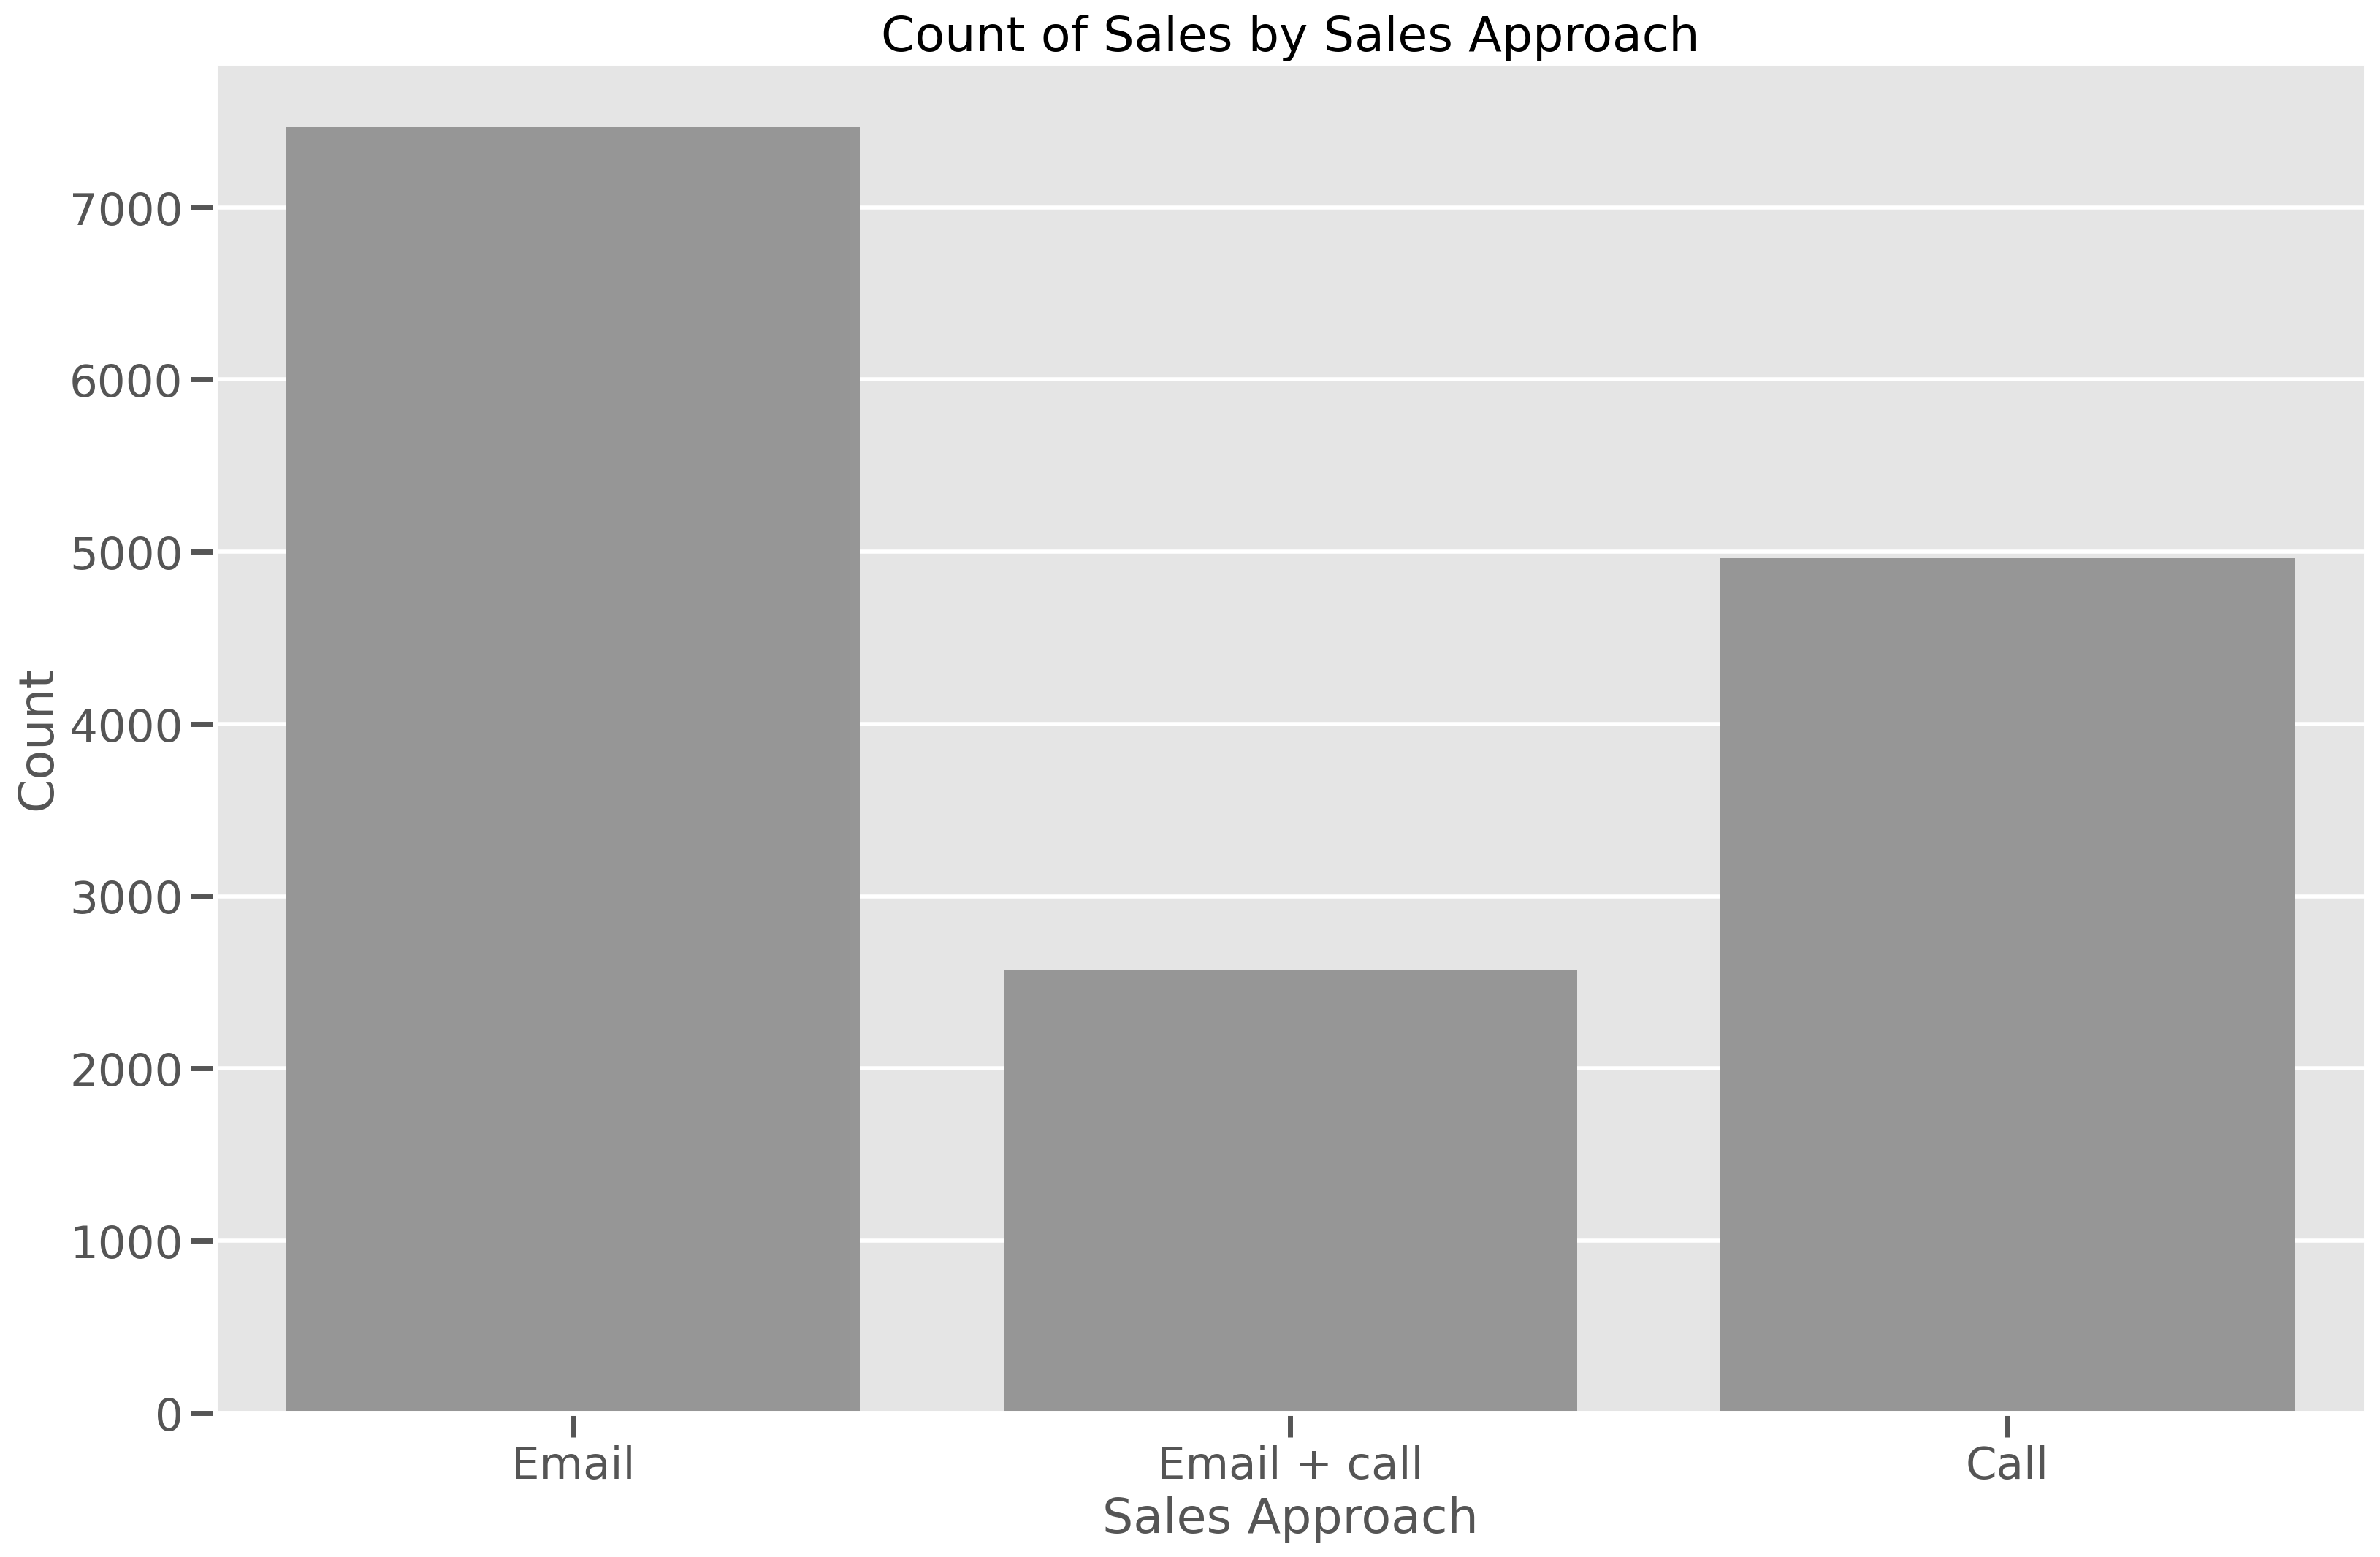

In [19]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.countplot(data=df, x='sales_method').set(title="Count of Sales by Sales Approach", xlabel="Sales Approach", ylabel="Count")
plt.show()

A deeper dive into each sales strategy shows that while the transaction generated by the combination of both email and call were about 17% the revenue generated by that same method is about 33% of the total revenue

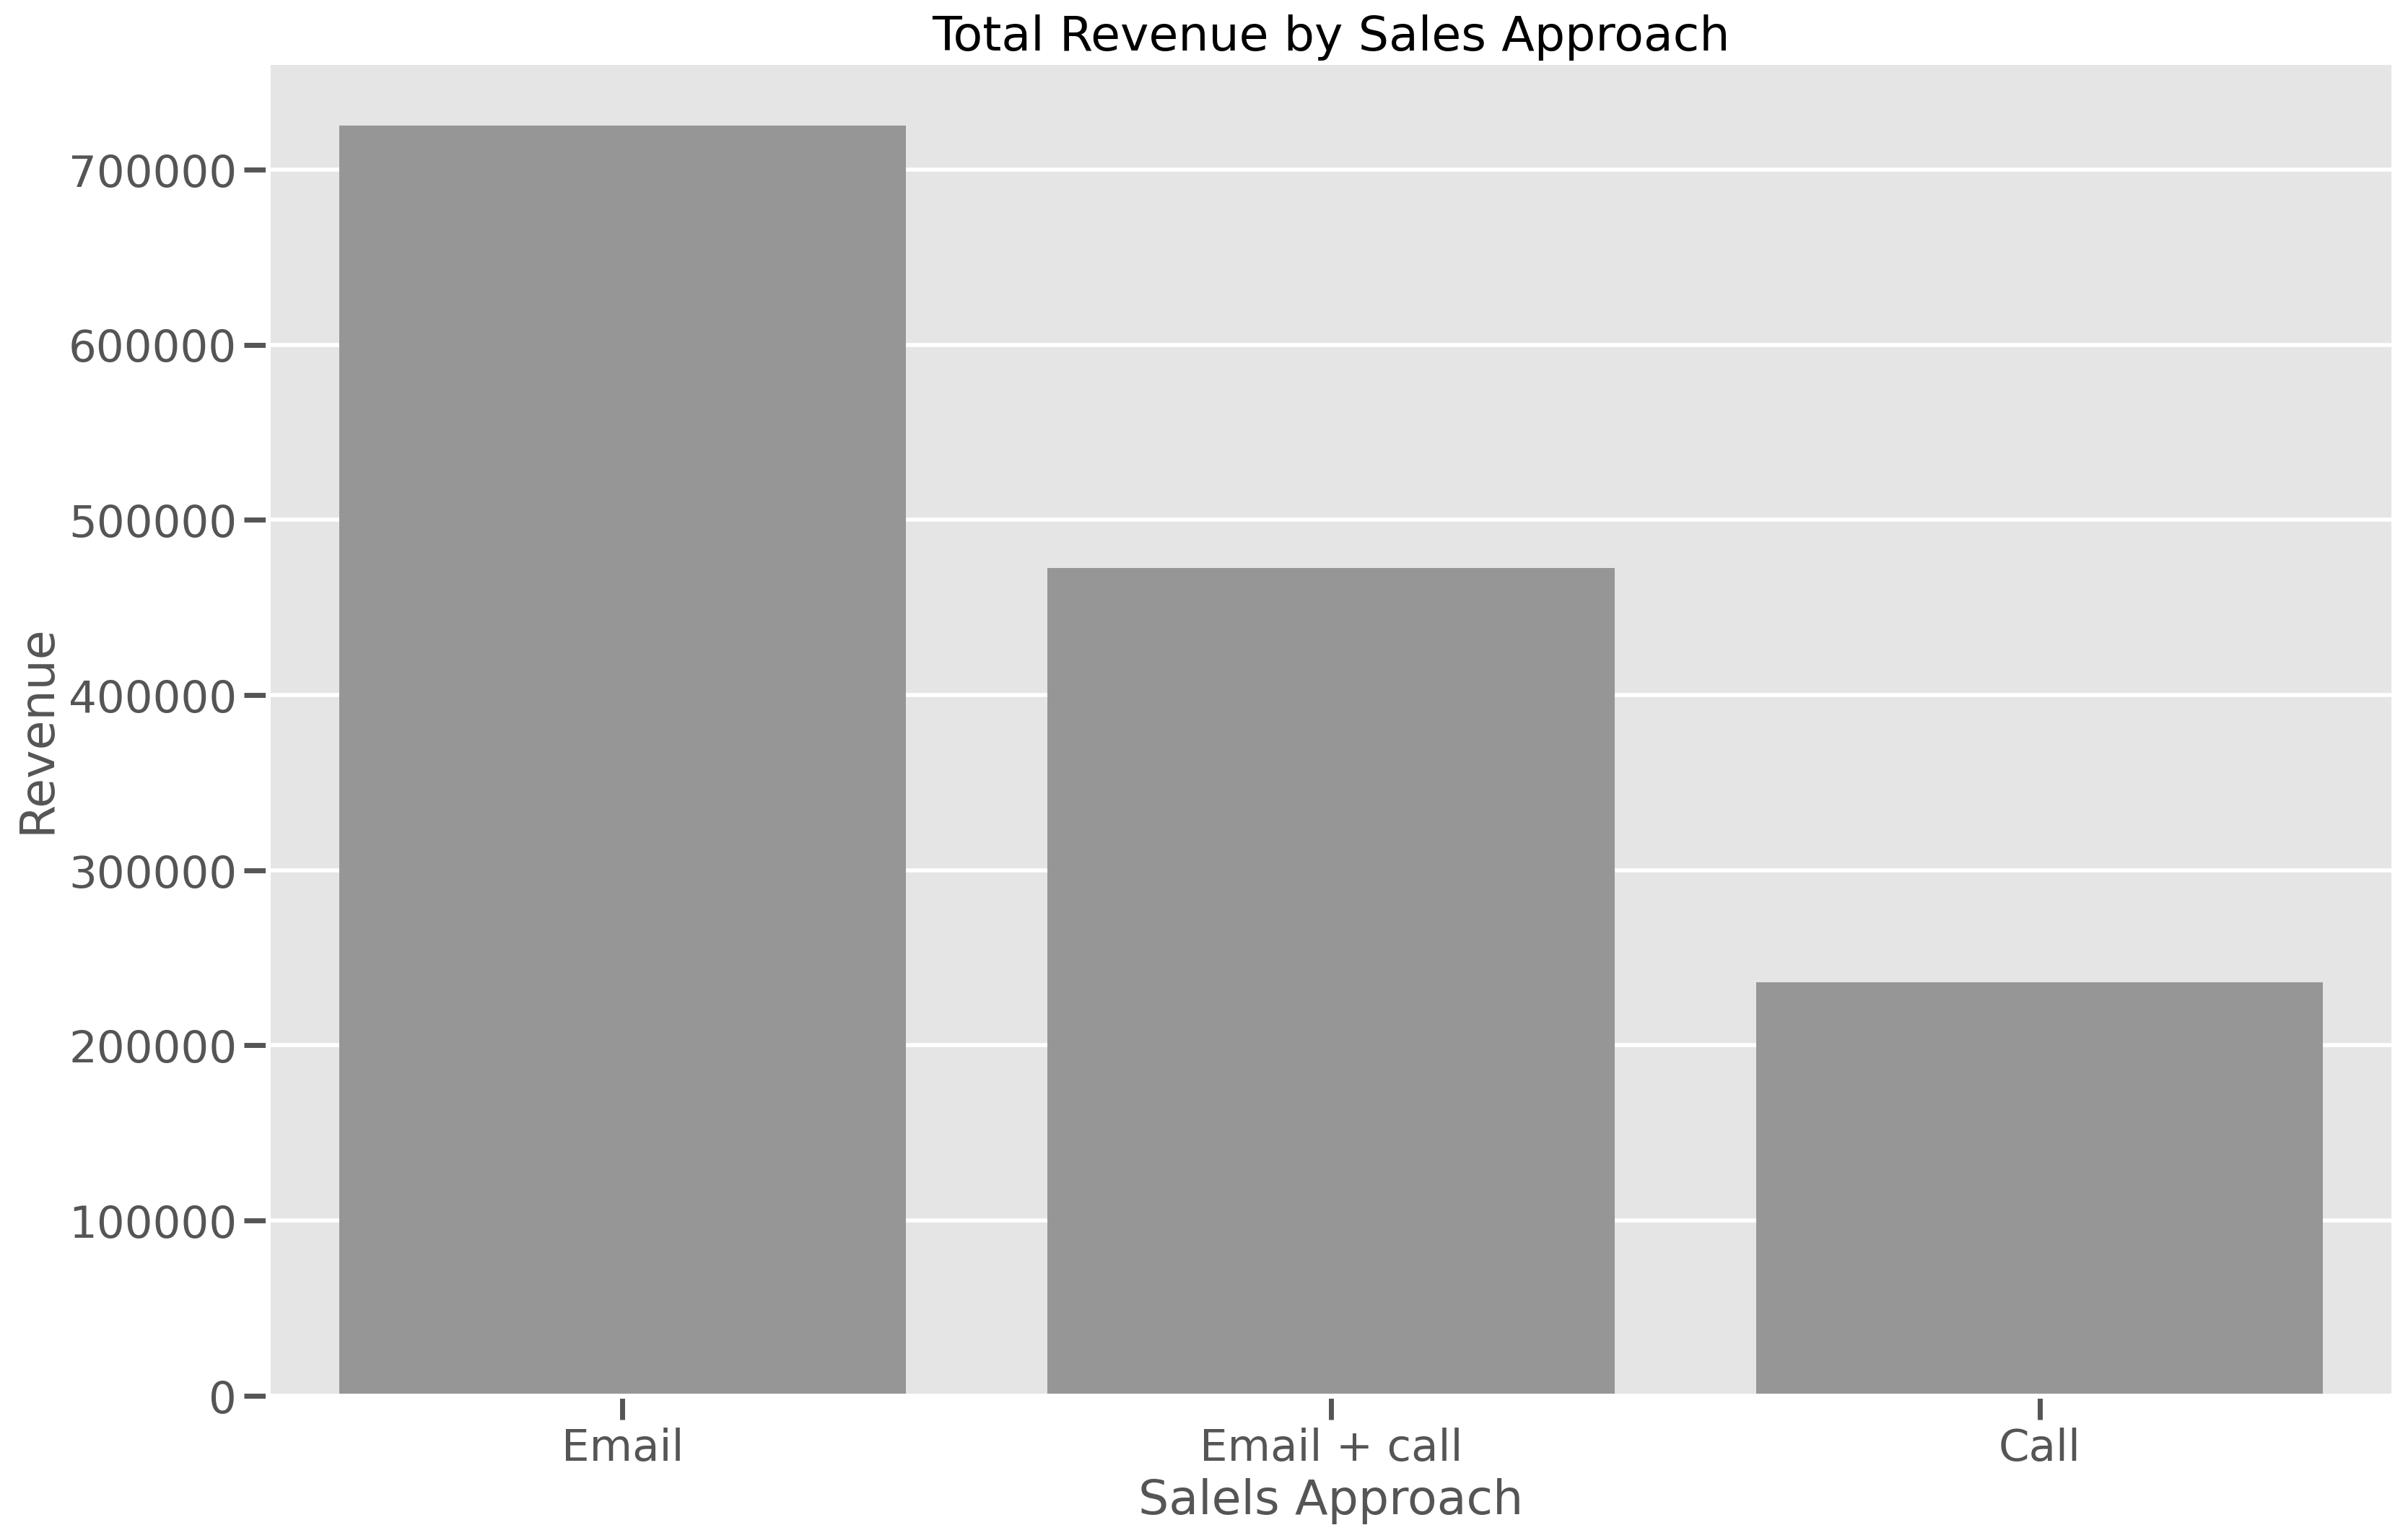

In [20]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.barplot(data=df, x='sales_method', y='revenue', estimator='sum', errorbar=None).set(title="Total Revenue by Sales Approach", xlabel="Salels Approach", ylabel="Revenue")
plt.show()

A look into the distribution of the sales shows that majority of the sales generated less than 140 dollars in revenue

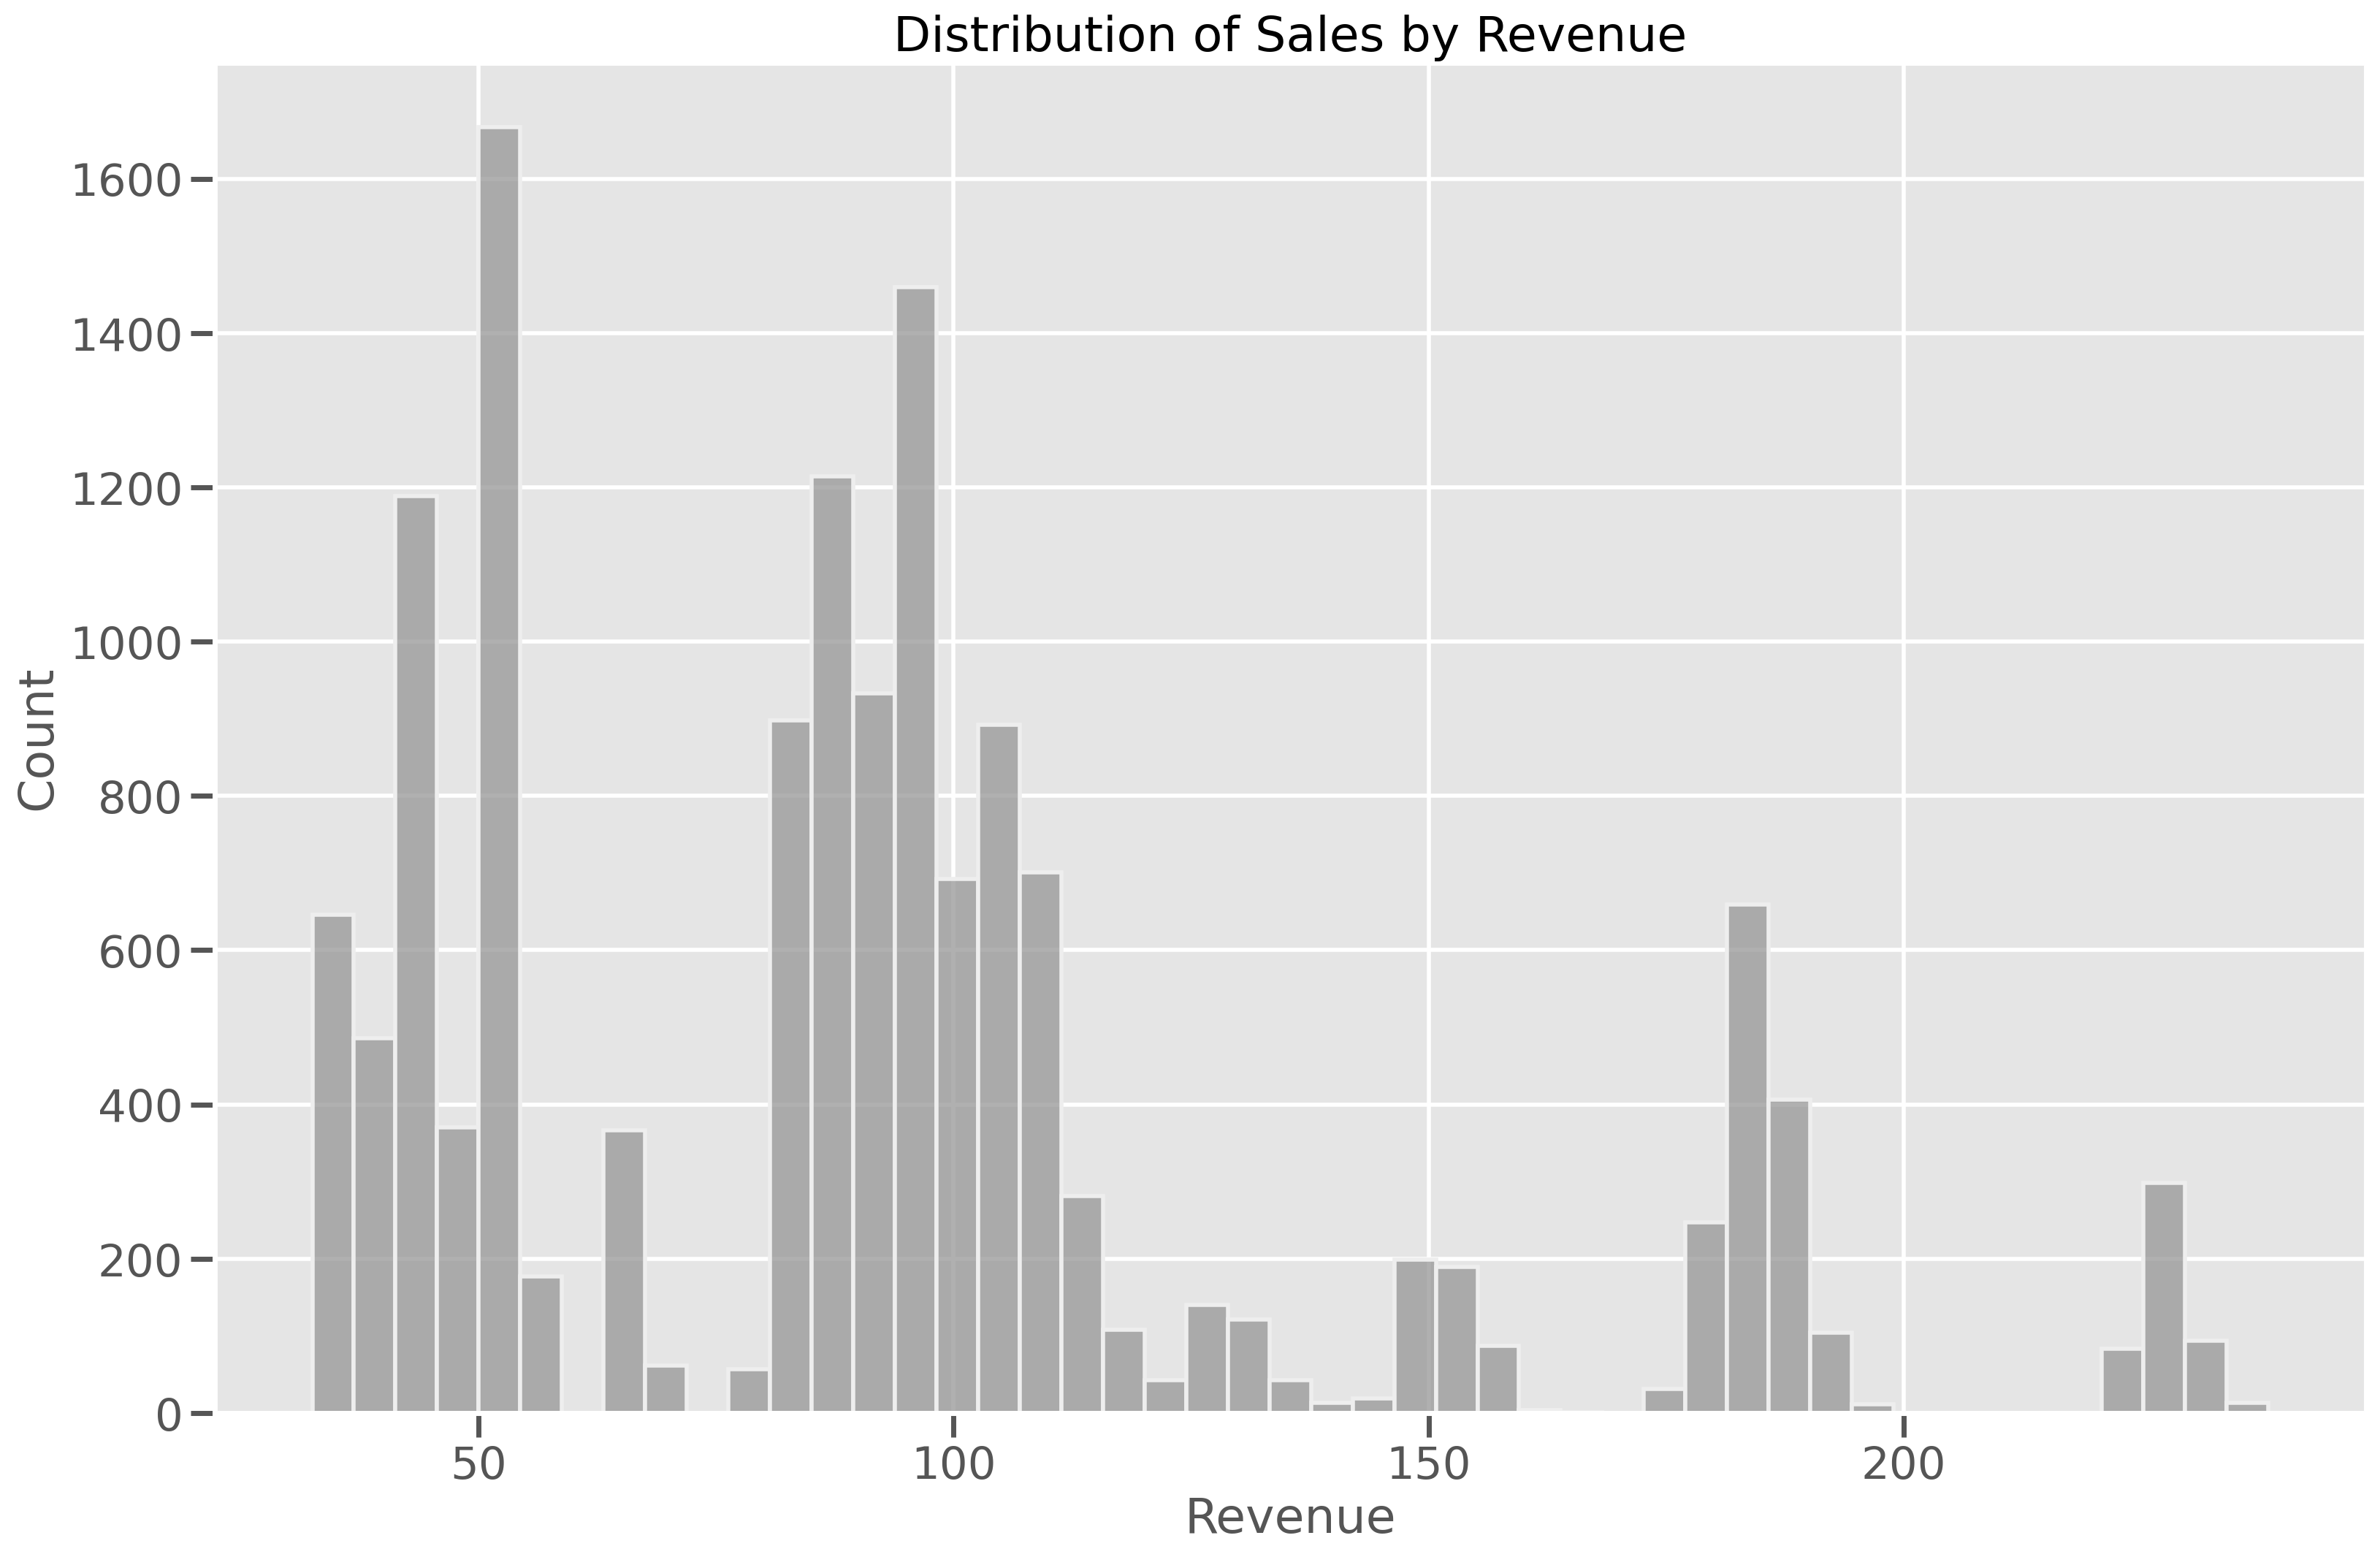

In [21]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.histplot(data=df, x='revenue').set(title="Distribution of Sales by Revenue", xlabel="Revenue", ylabel="Count")
plt.show()

A deeper dive into the distribution of the sales shows that there are clear segments in the
distribution of the sales with sales aobve 145 are represented solely by Email and call sales strategy.A further look shows that sales below 80 are represented by sales strategy using Calls only.

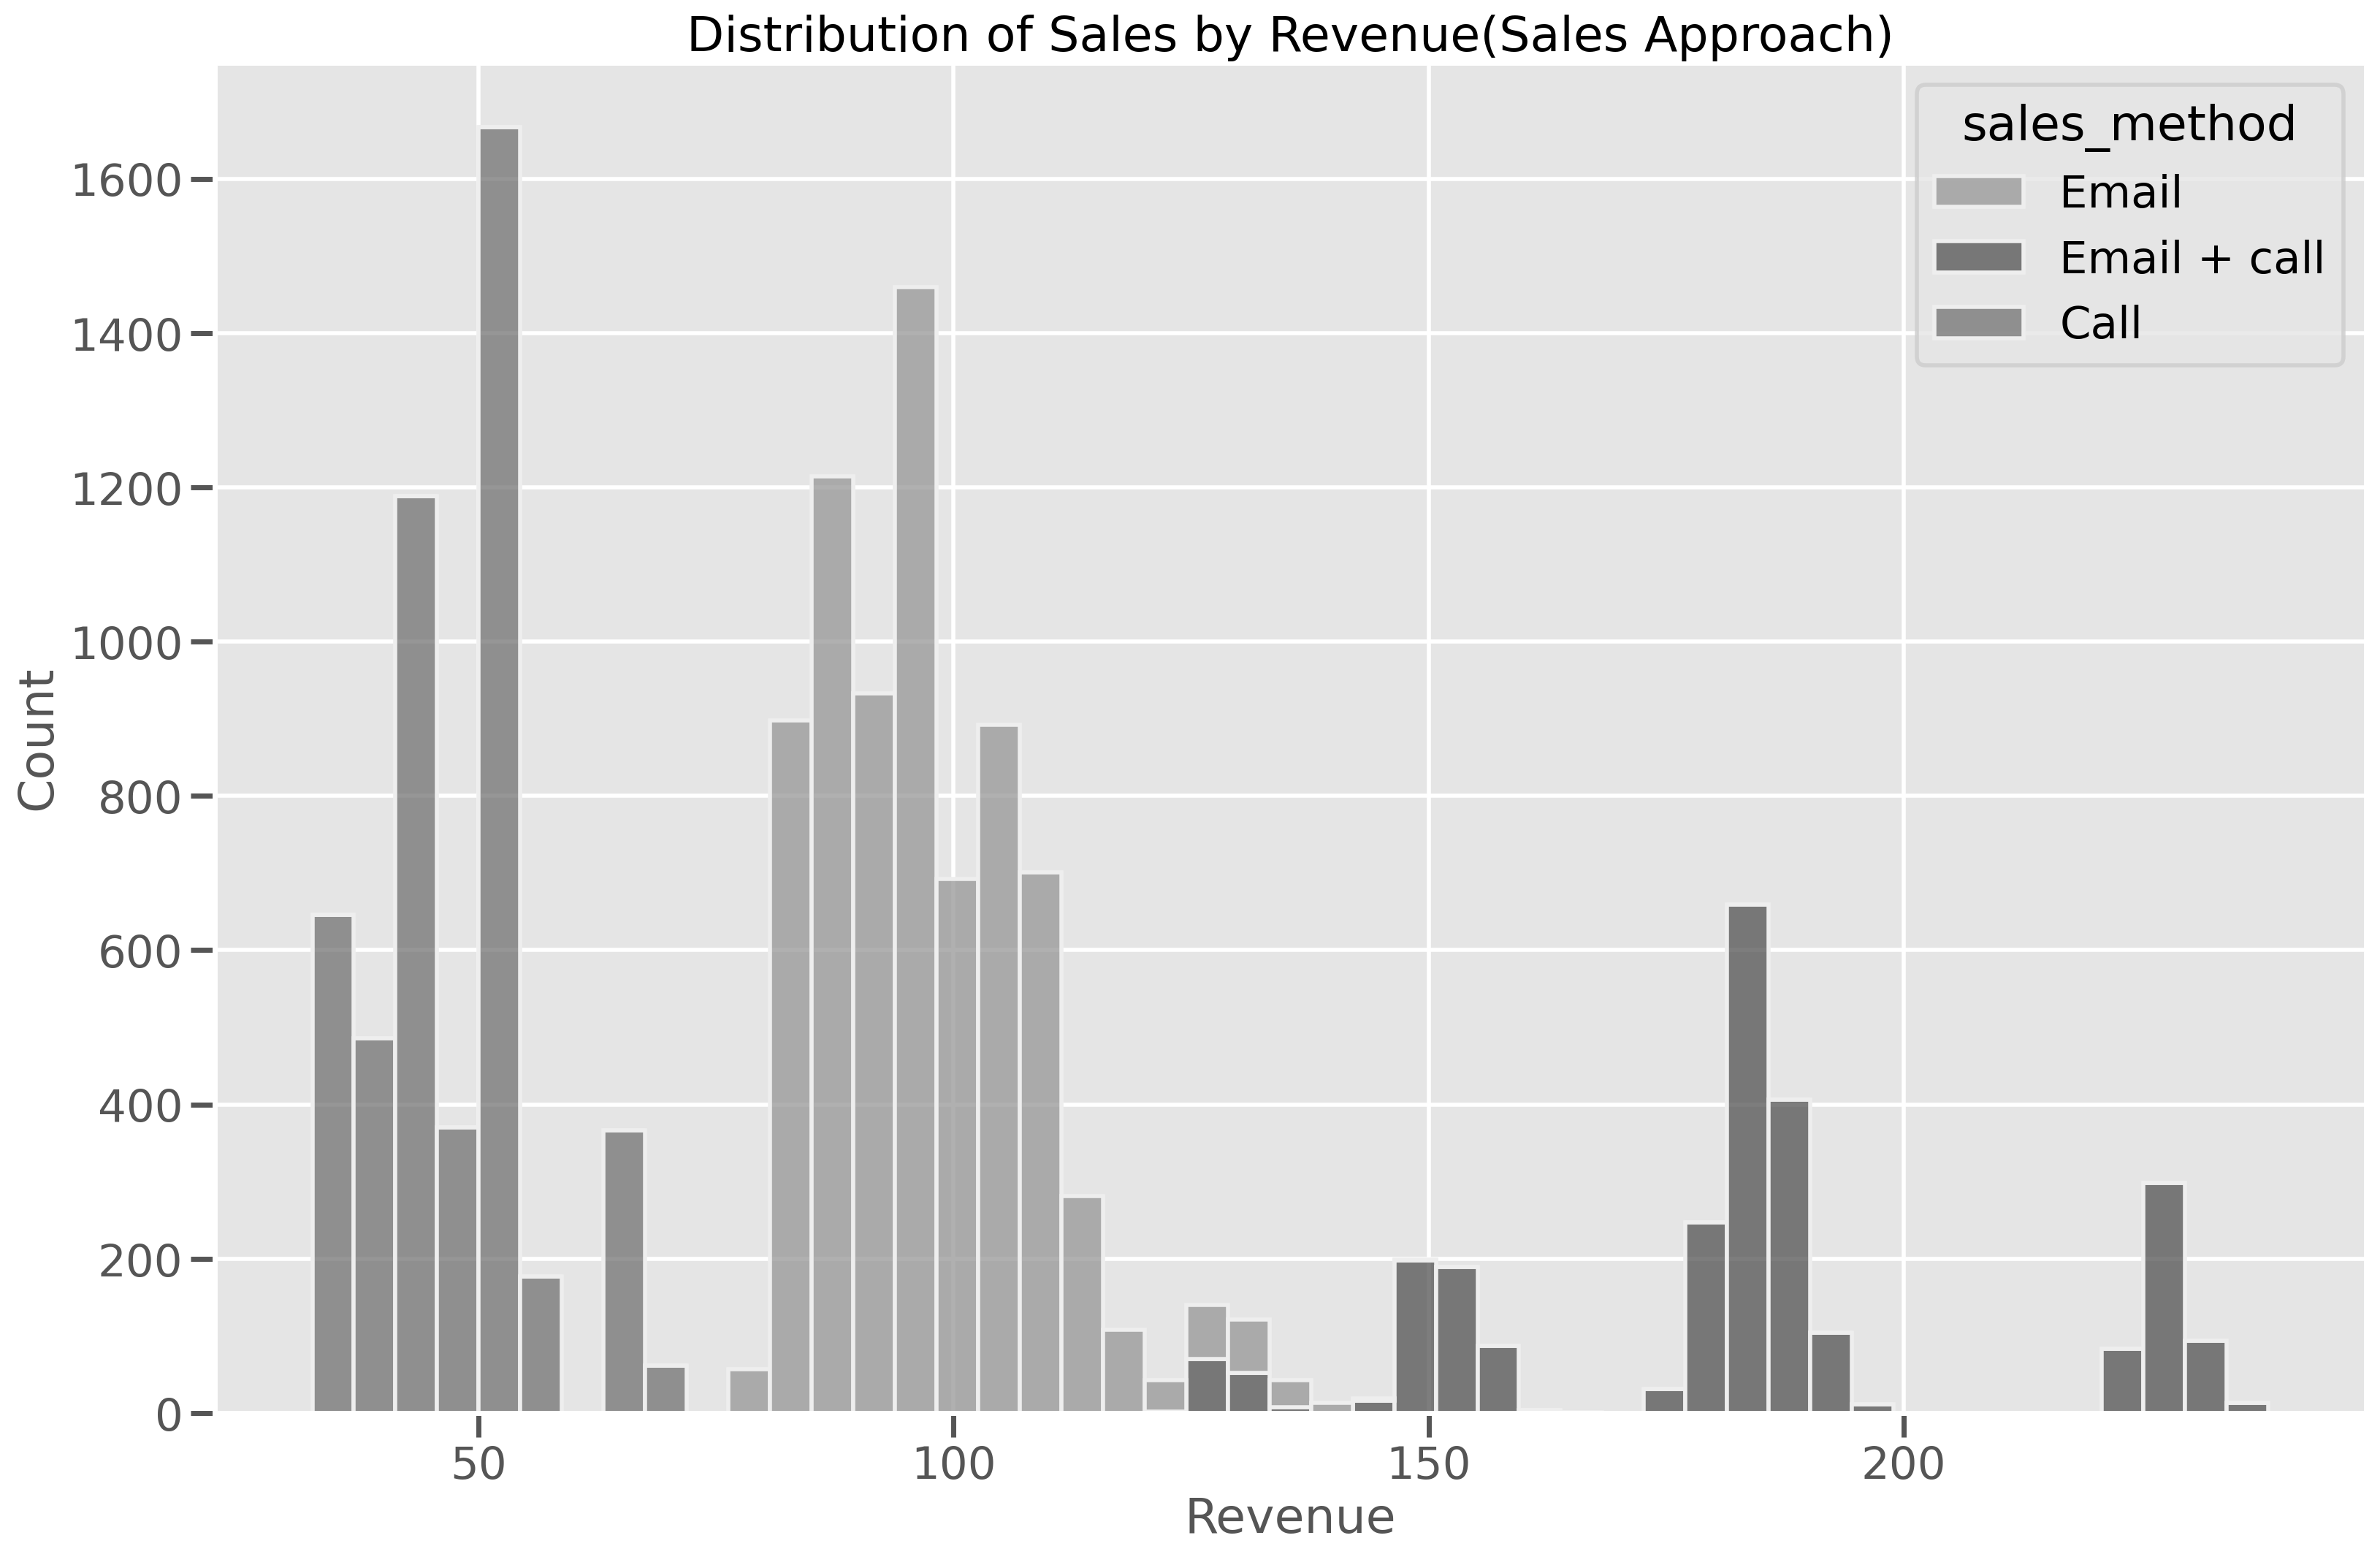

In [22]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.histplot(data=df, x='revenue', hue='sales_method', multiple='stack').set(title="Distribution of Sales by Revenue(Sales Approach)", xlabel="Revenue", ylabel="Count")
plt.show()

## Sales Generated Overtime
The timeline of the sales generated over the course of 6 weeks shows that about a quarter of the sales were made in the first week. The sales over the next 4 weeks shows the sales made in those week were constant with a dip finally in the 6th week only generating about 8% of the total sales.

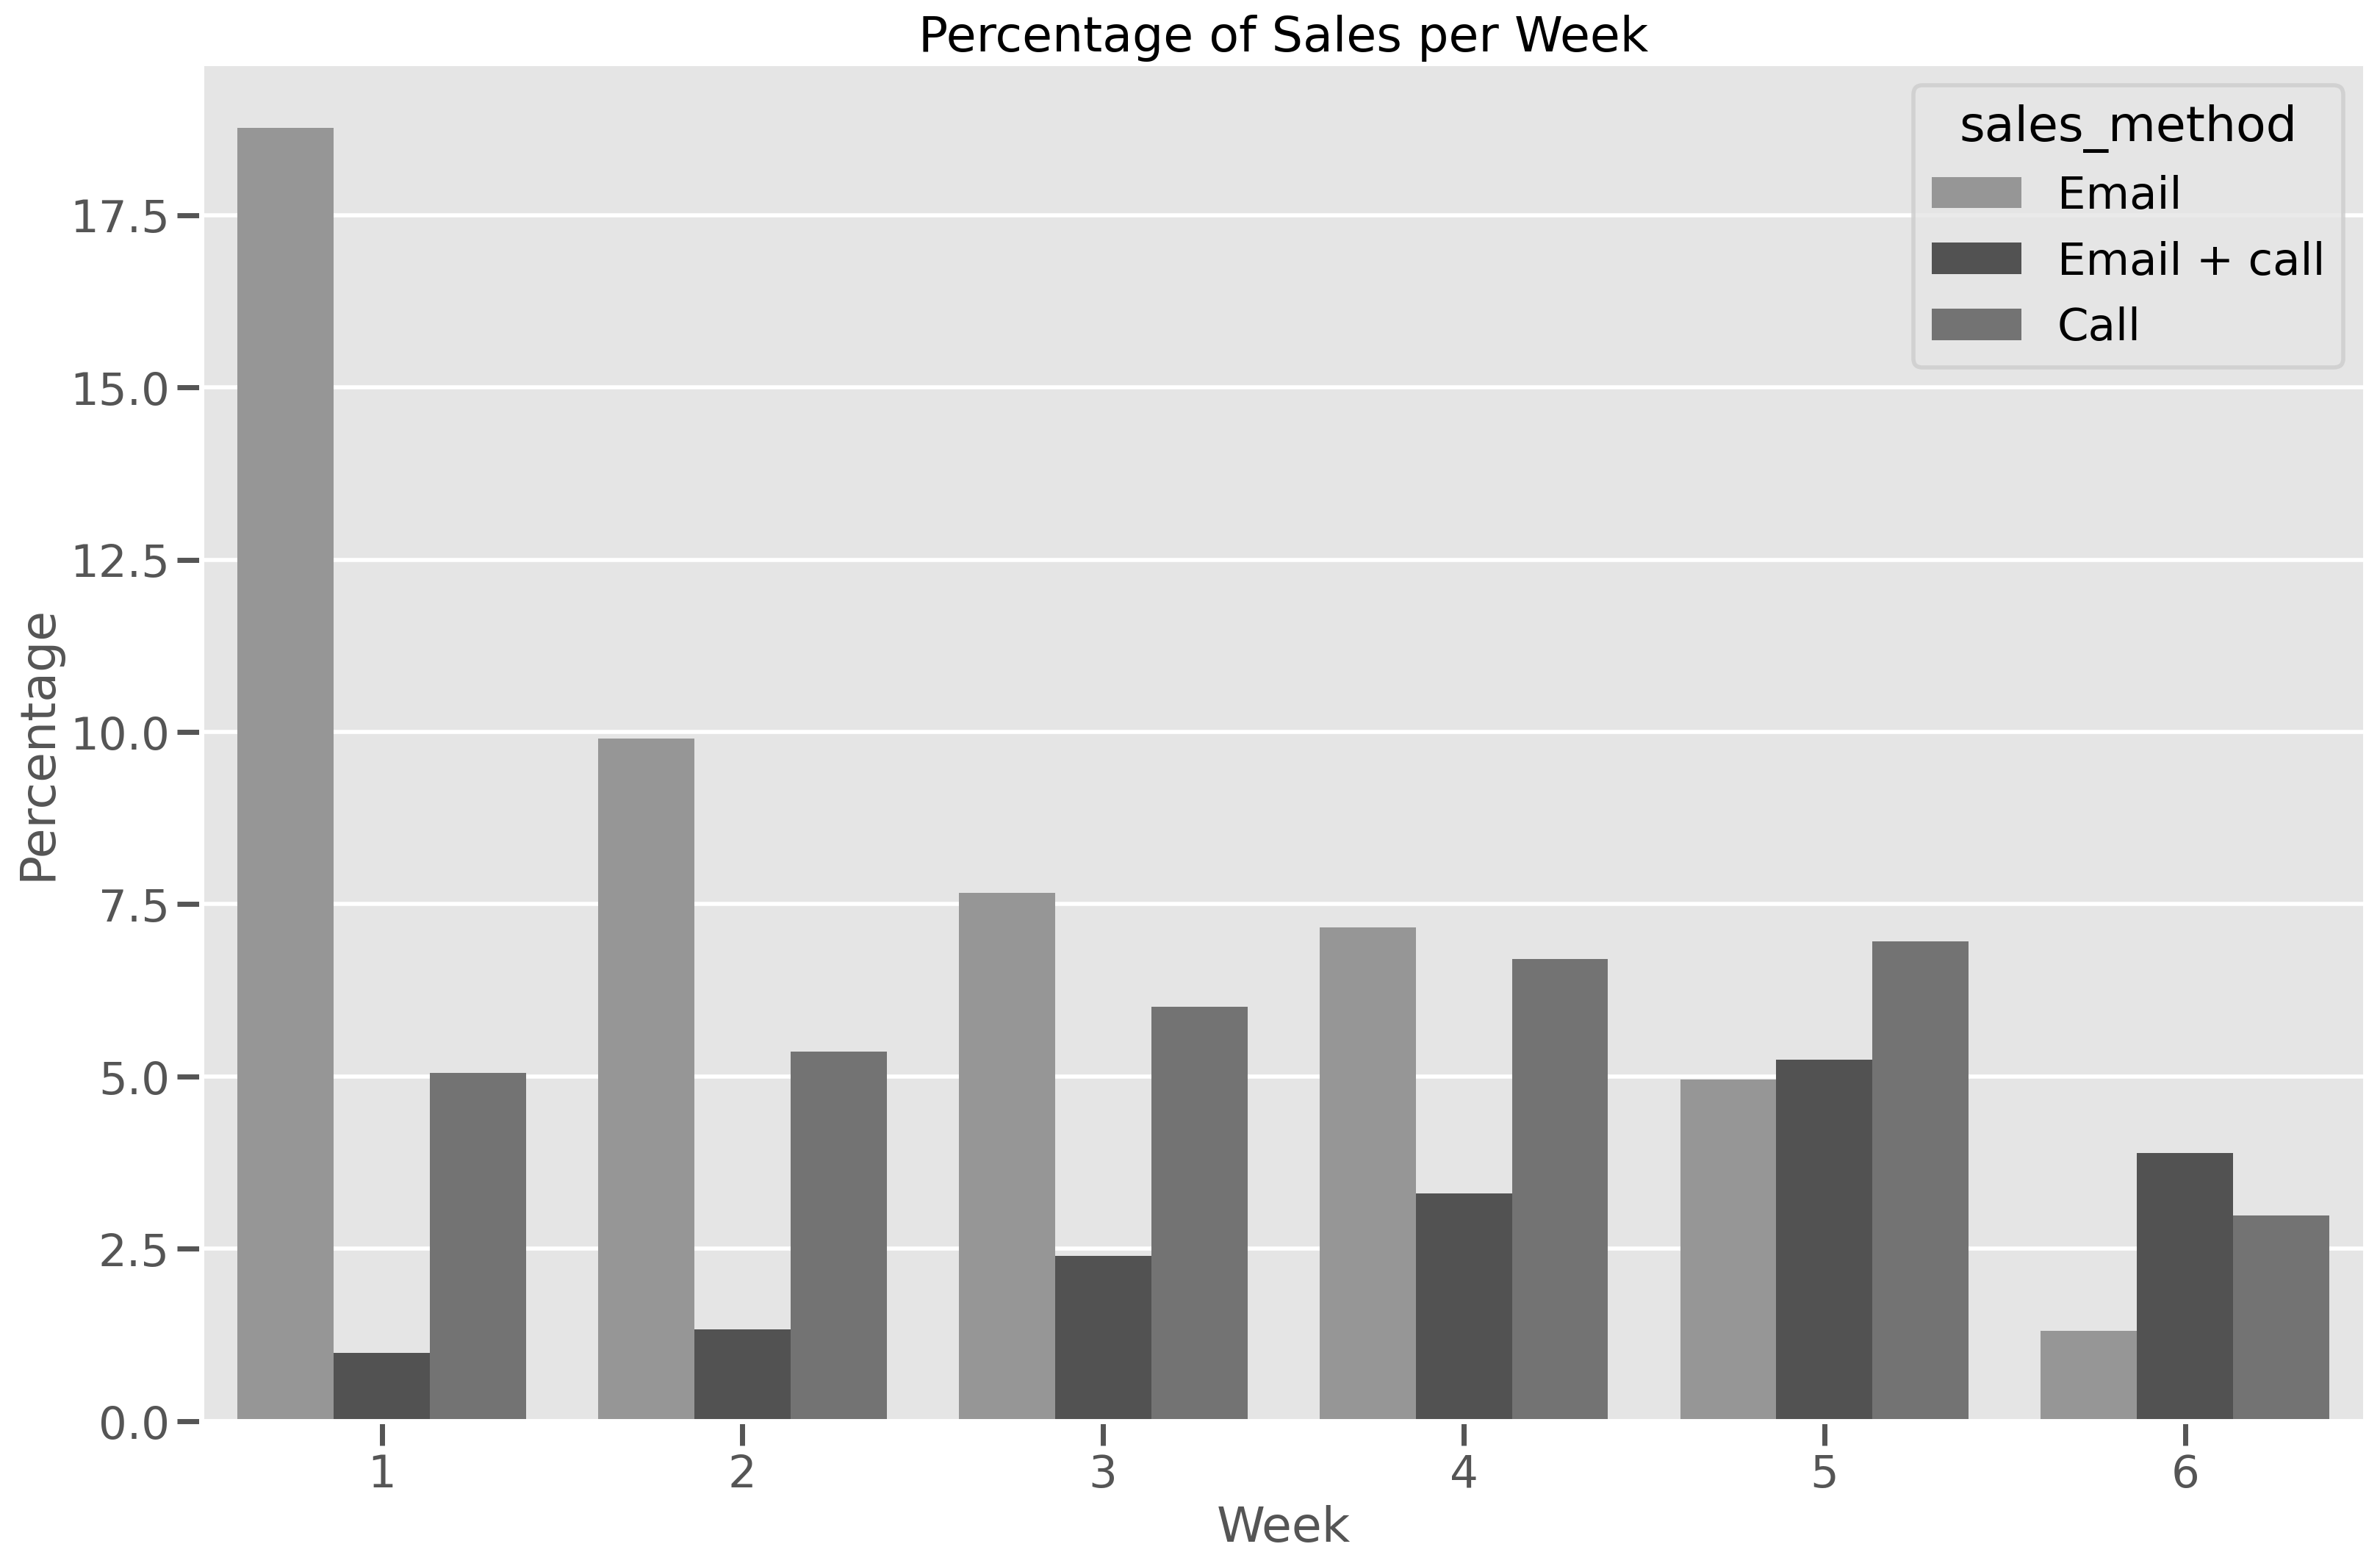

In [23]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.countplot(data=df, x='week', stat='percent', hue='sales_method').set(title="Percentage of Sales per Week", xlabel="Week", ylabel="Percentage")
plt.show()

The graph present shows changes that occur in terms of revenue with respect to the sales approach. The email approach shows a sharp decrease in revenue generated after the first week, The call approach shows a slight increase in revenue after the first week while the combination of both method shows a steady and moderate increase in revenue over the course of 5 week with a decrease on the last week.

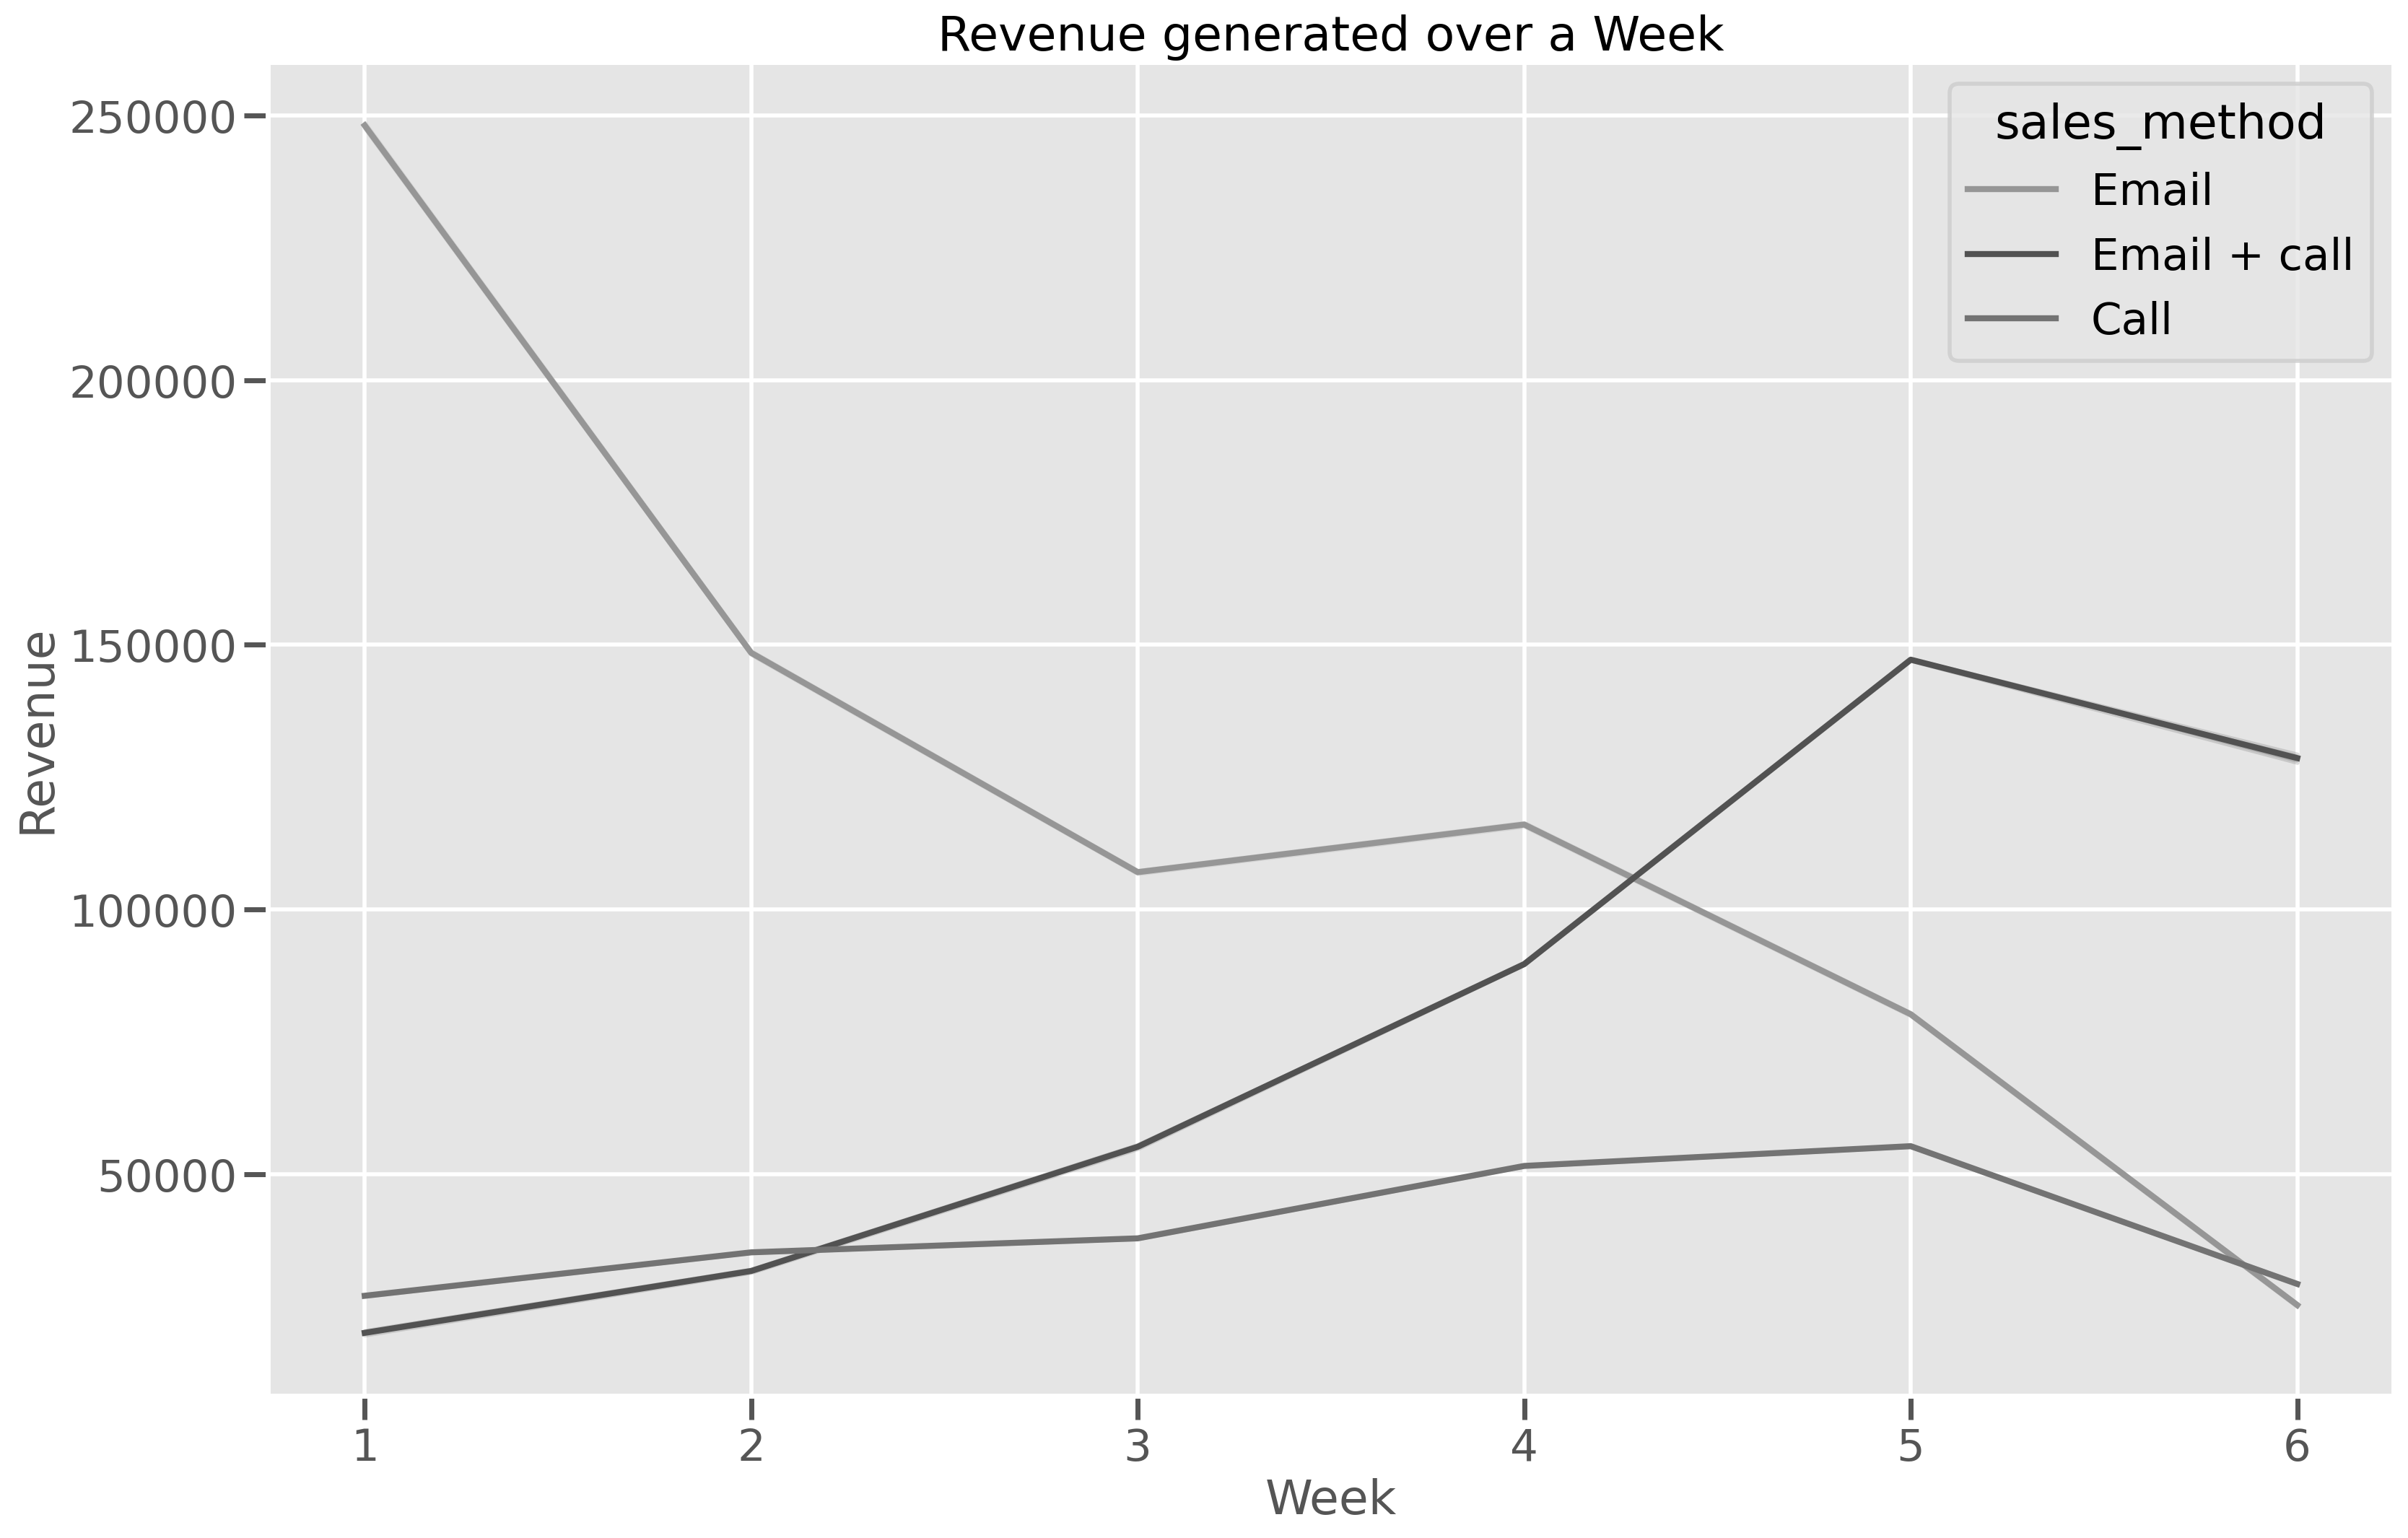

In [24]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.lineplot(data=df, x='week', y='revenue', hue='sales_method', estimator='sum').set(title="Revenue generated over a Week", xlabel="Week", ylabel="Revenue")
plt.show()

In [25]:
df.groupby('sales_method')[['week', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']].mean()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
sales_method,,,,,
Call,3.426441,9.509674,47.597467,5.175131,24.423821
Email,2.469060,9.729306,97.127684,4.980579,24.754353
Email + call,4.291602,12.225505,183.651233,4.507387,26.771384


In [26]:
u_df = df.groupby('sales_method').agg({'revenue':'sum', 'years_as_customer':'size'}).reset_index()
u_df['avg_revenue_per_customer'] = u_df['revenue']/u_df['years_as_customer']
u_df.sort_values('avg_revenue_per_customer', ascending=False)

,sales_method,revenue,years_as_customer,avg_revenue_per_customer
2,Email + call,472350.970166,2572,183.651233
1,Email,725155.290202,7466,97.127684
0,Call,236178.631537,4962,47.597467


## Business Metrics
The goal of the business is to use the best sales approach for the new product line, I would recommend that we use **the average amount spent by the customers for for each sales approach** as our metric.

Based on the analysis for the this product line the Email + Call approach generated the most revenue per customer with it generating approximately 2 times more revenue compared to the Email approach and approximately 4 times more revenues when compared to the Call approach. If the revenue per customer keeps steady or keep increasing with the increasing implementation of this approach, this indicated the viability of this approach in the long term.

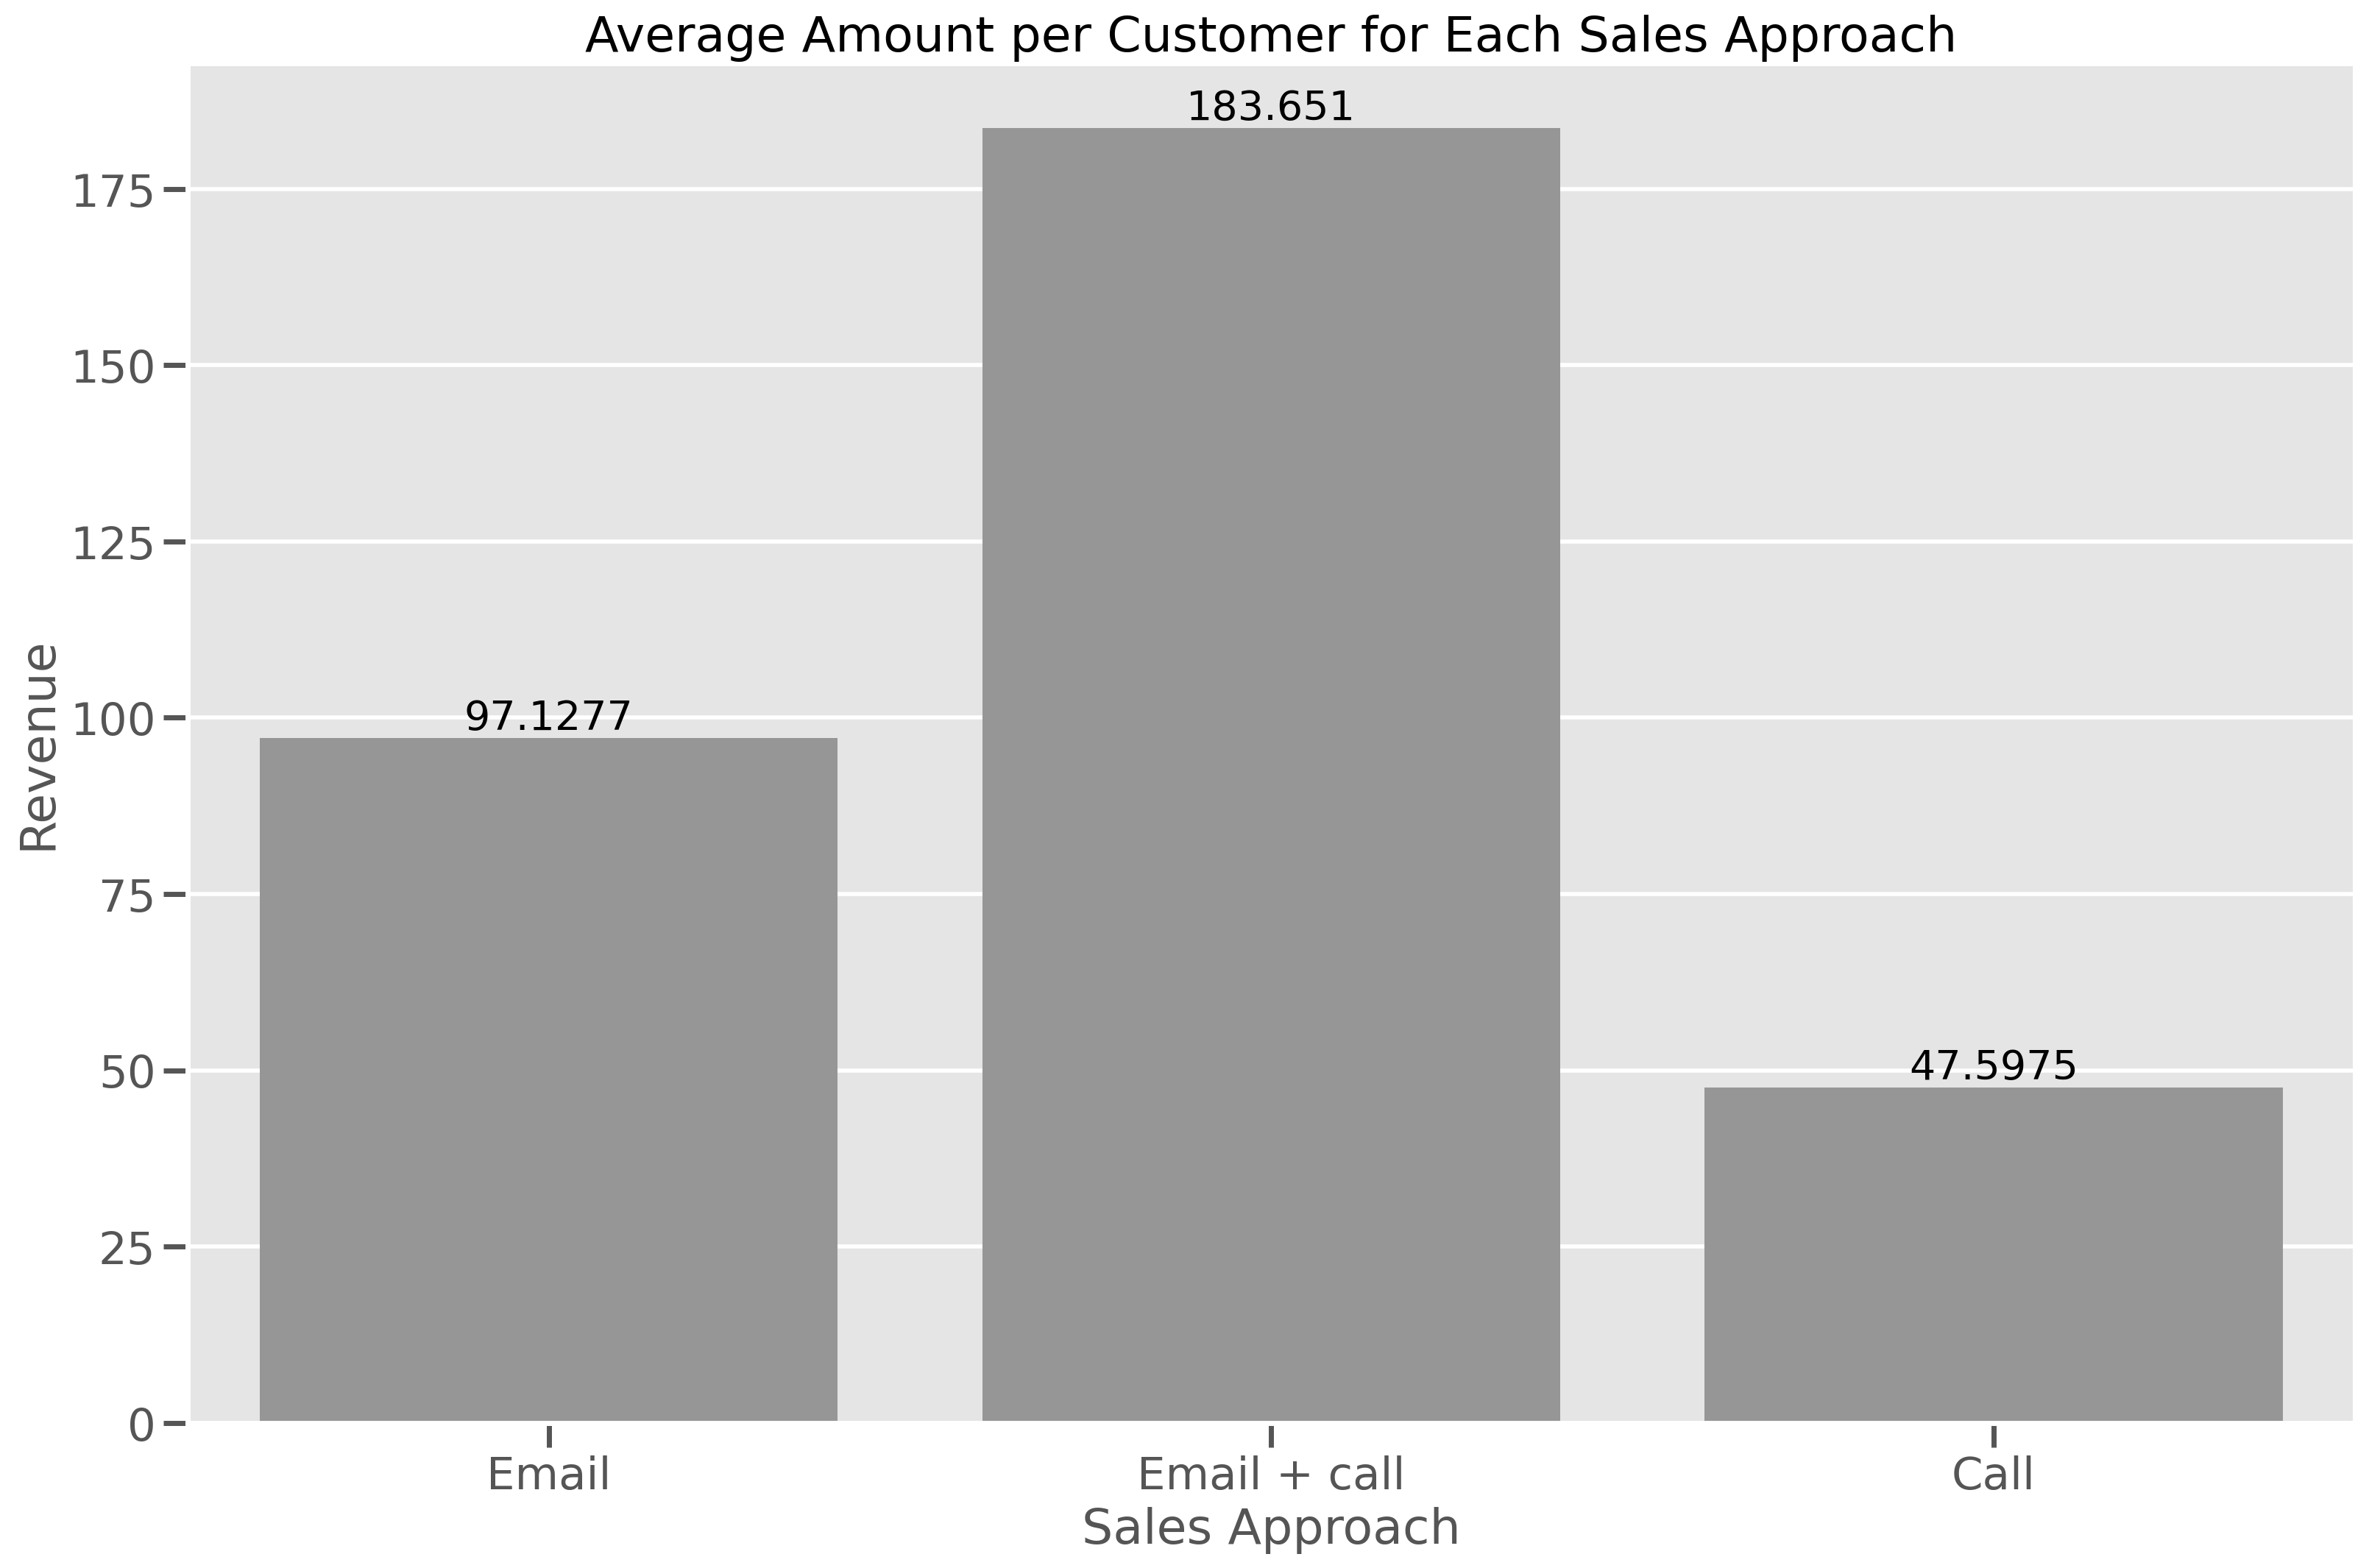

In [27]:
fig, axes = plt.subplots(figsize=(19, 12))
sns.barplot(data=df, x='sales_method', y='revenue', errorbar=None).set(title="Average Amount per Customer for Each Sales Approach", xlabel="Sales Approach", ylabel="Revenue")
axes.bar_label(axes.containers[0], fontsize=20);
plt.show()

## Recommendation
For the following weeks and new product lines, I would recommend we focus on the following:
- Use the key metric to monitor whether there is any change in the impact of the approach
- To increase the percentage of customers the Email + Call approach will be used for
- The data collected should in the future endeavor to include the particular product purchased for in-depth analysis into the customer behaviour.